In [1]:
%%capture
cd ..

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection, metrics
from sklearn.datasets import make_regression
from palma import Project, ModelEvaluation, ModelSelector
from palma.components import RegressionAnalysis, ShapAnalysis
from palma.utils import plotting
X, y = make_regression(n_informative=2, n_features=10)
X, y = pd.DataFrame(X), pd.Series(y)

**Create the project**
To create vanilla project (without components), only input data $X$, target data $y$ and validation method needs to be provided.



In [3]:
project = Project(problem="regression", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=5, random_state=42),
)

C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Here are representation of the validation strategy

- For validation steps
- For test steps

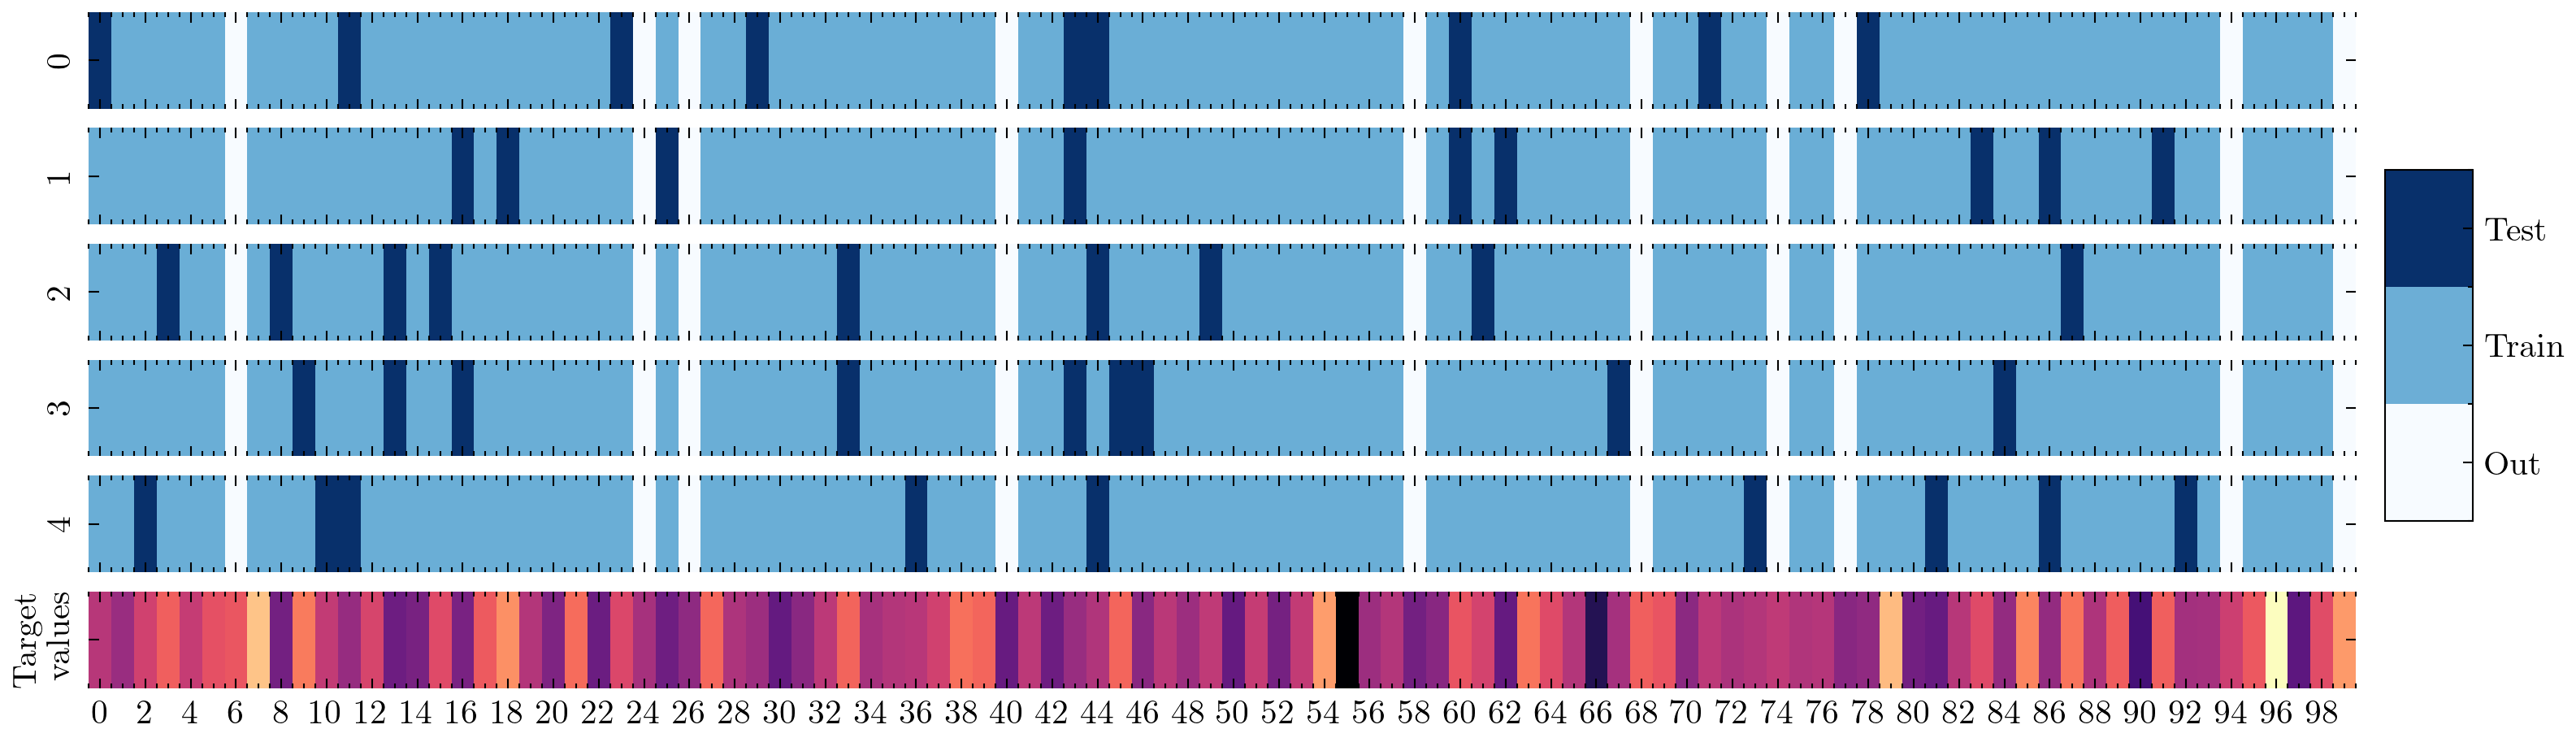

In [4]:
res = plotting.plot_splitting_strategy(
    project.X, project.y, 
    iter_cross_validation=project.validation_strategy.indexes_val, cmap="rainbow_r")

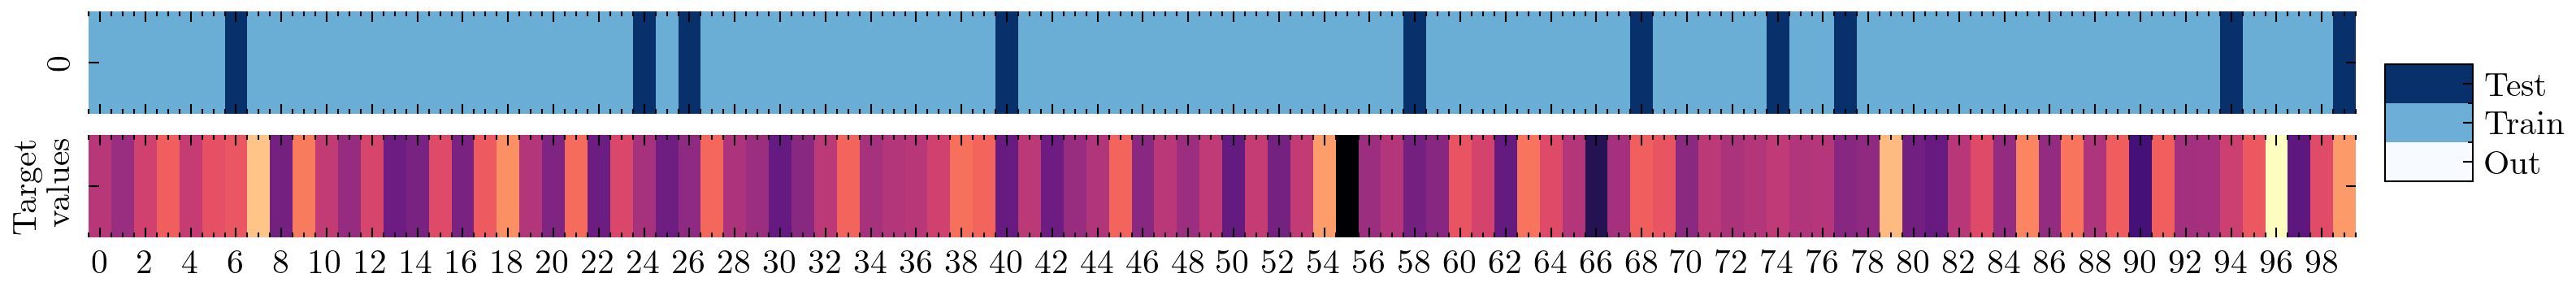

In [5]:
res = plotting.plot_splitting_strategy(
    project.X, project.y, 
    iter_cross_validation=project.validation_strategy.indexes_train_test, cmap="rainbow_r")

In [6]:
%%capture
ms = ModelSelector(engine="FlamlOptimizer",
                   engine_parameters=dict(time_budget=5))
ms.start(project)

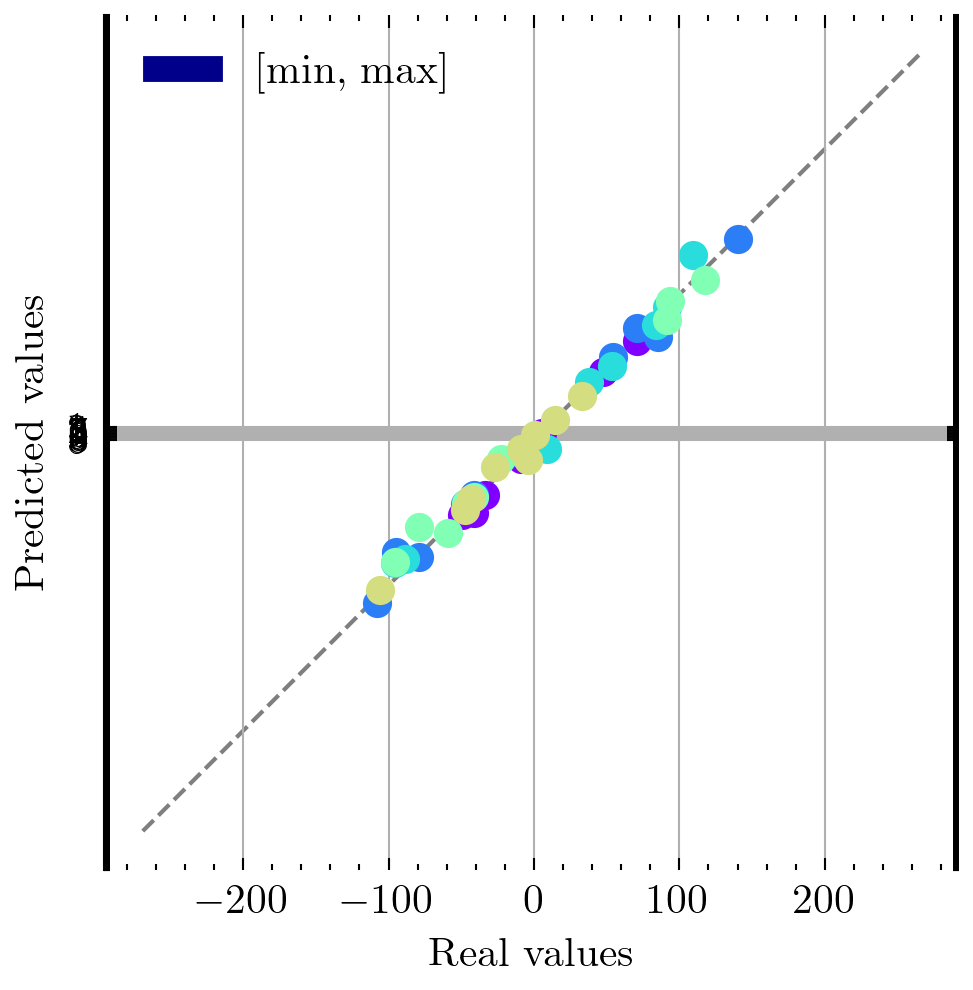

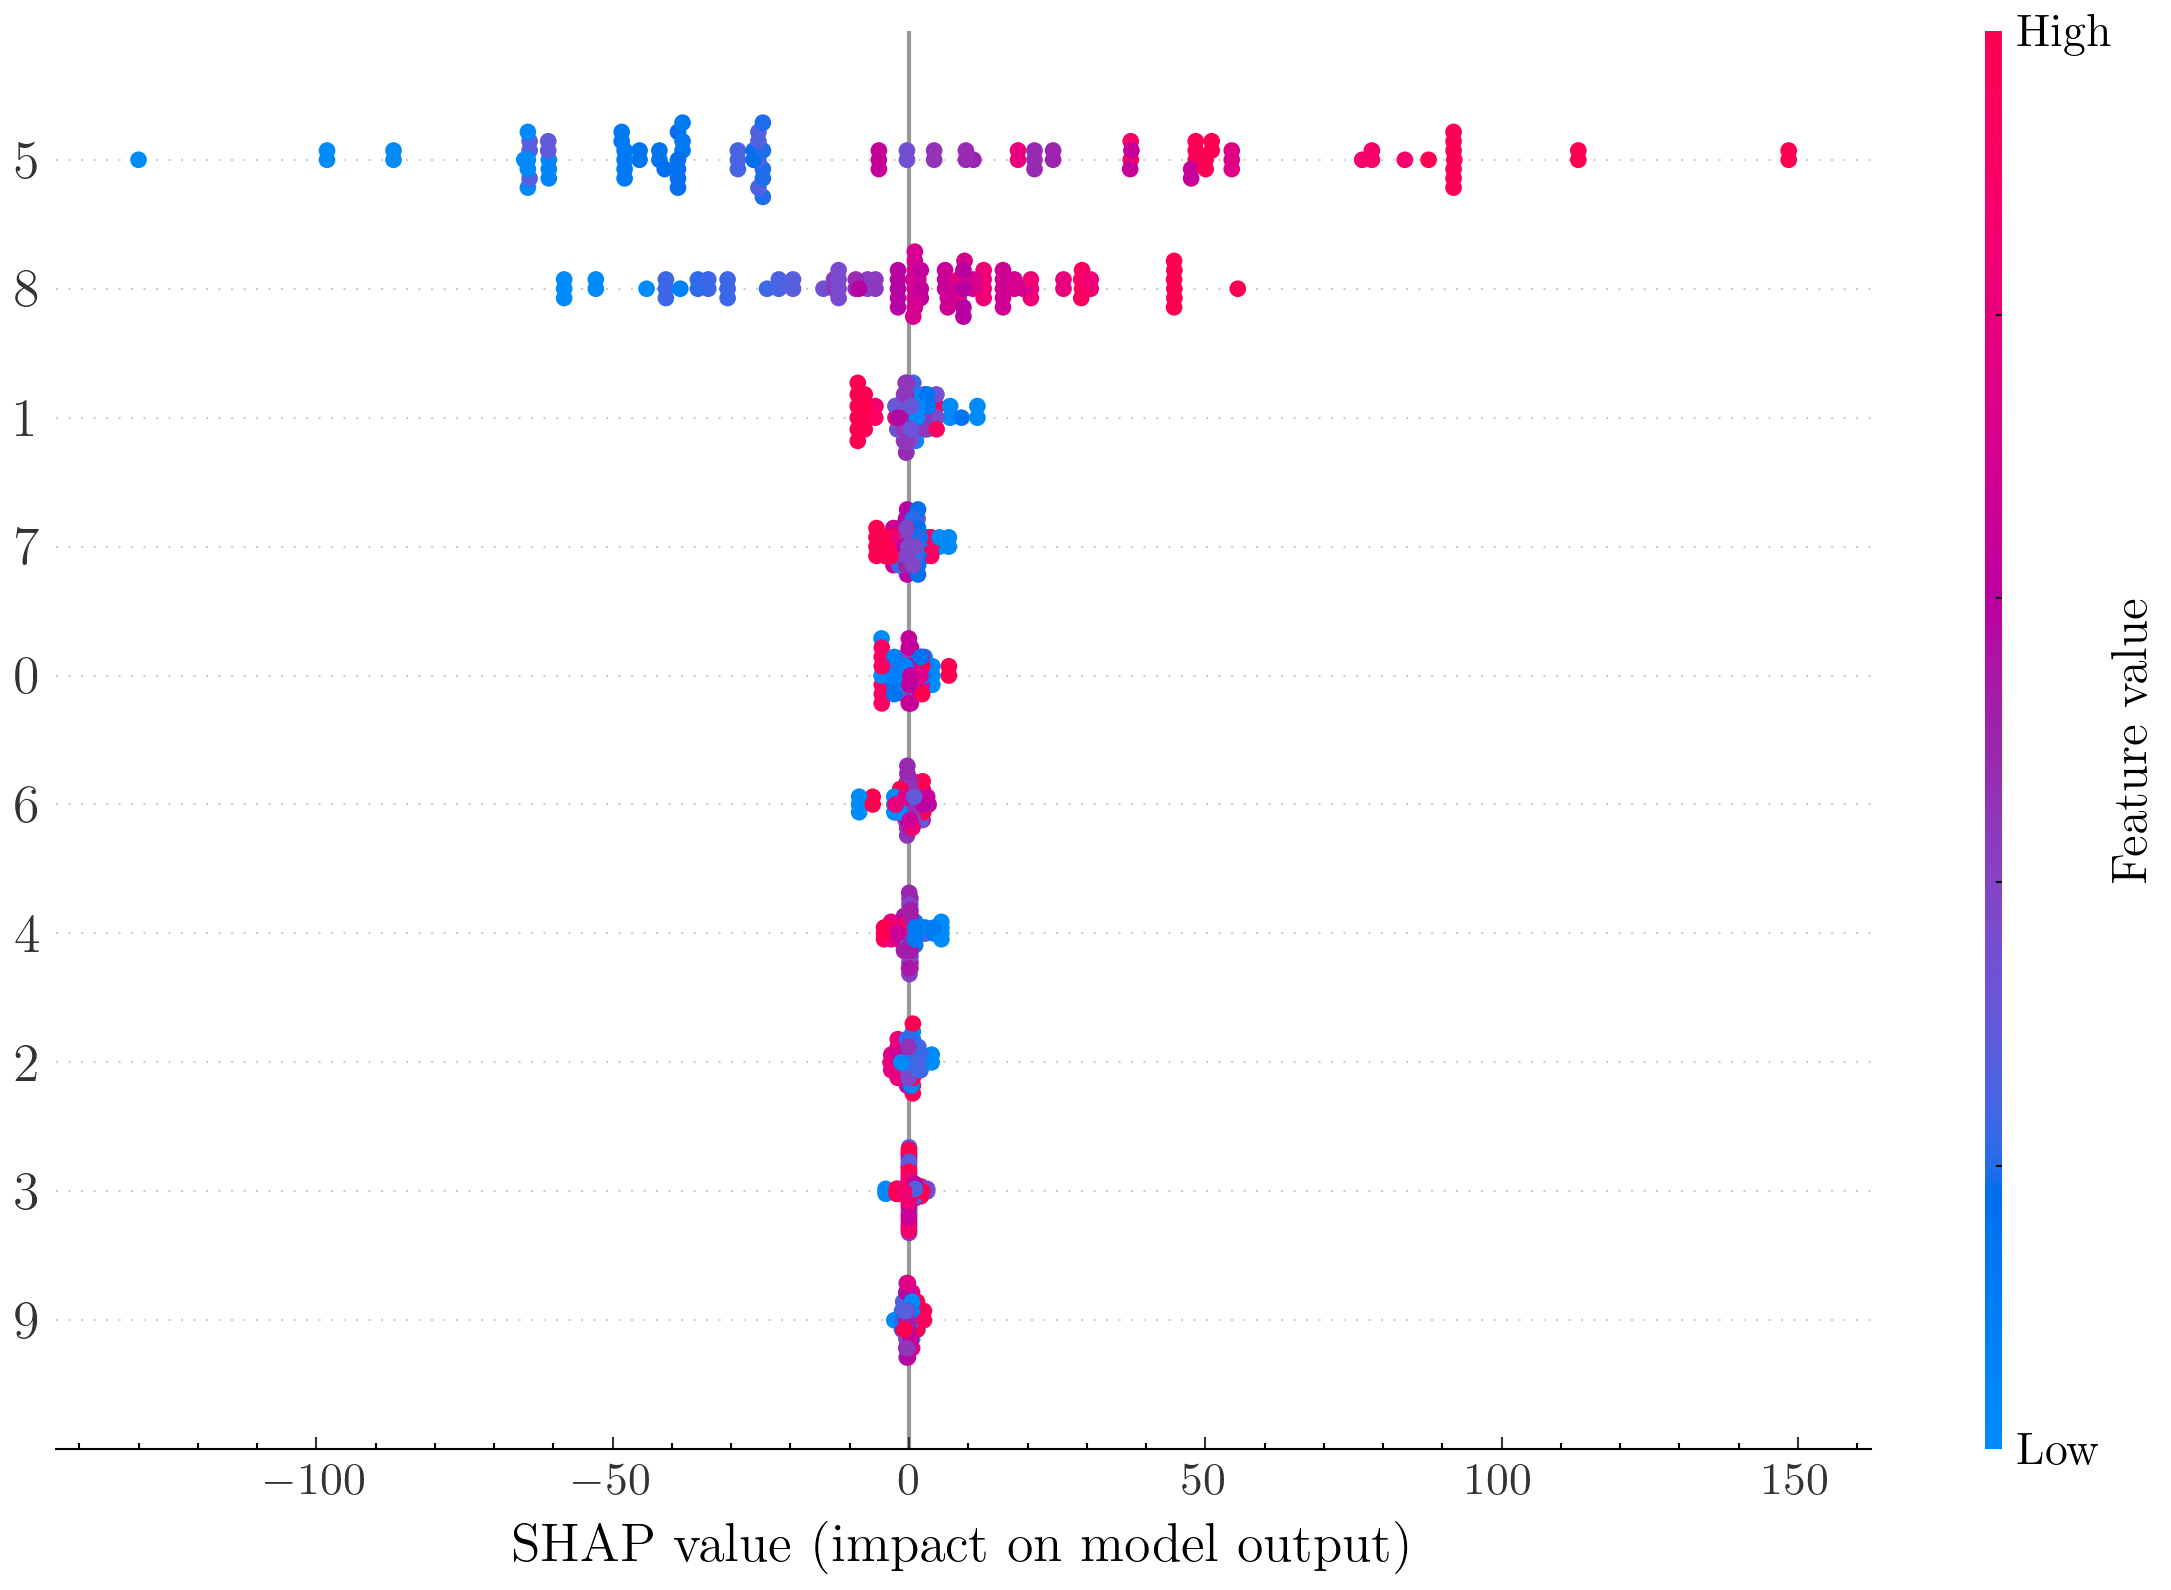

<Figure size 1050x1050 with 0 Axes>

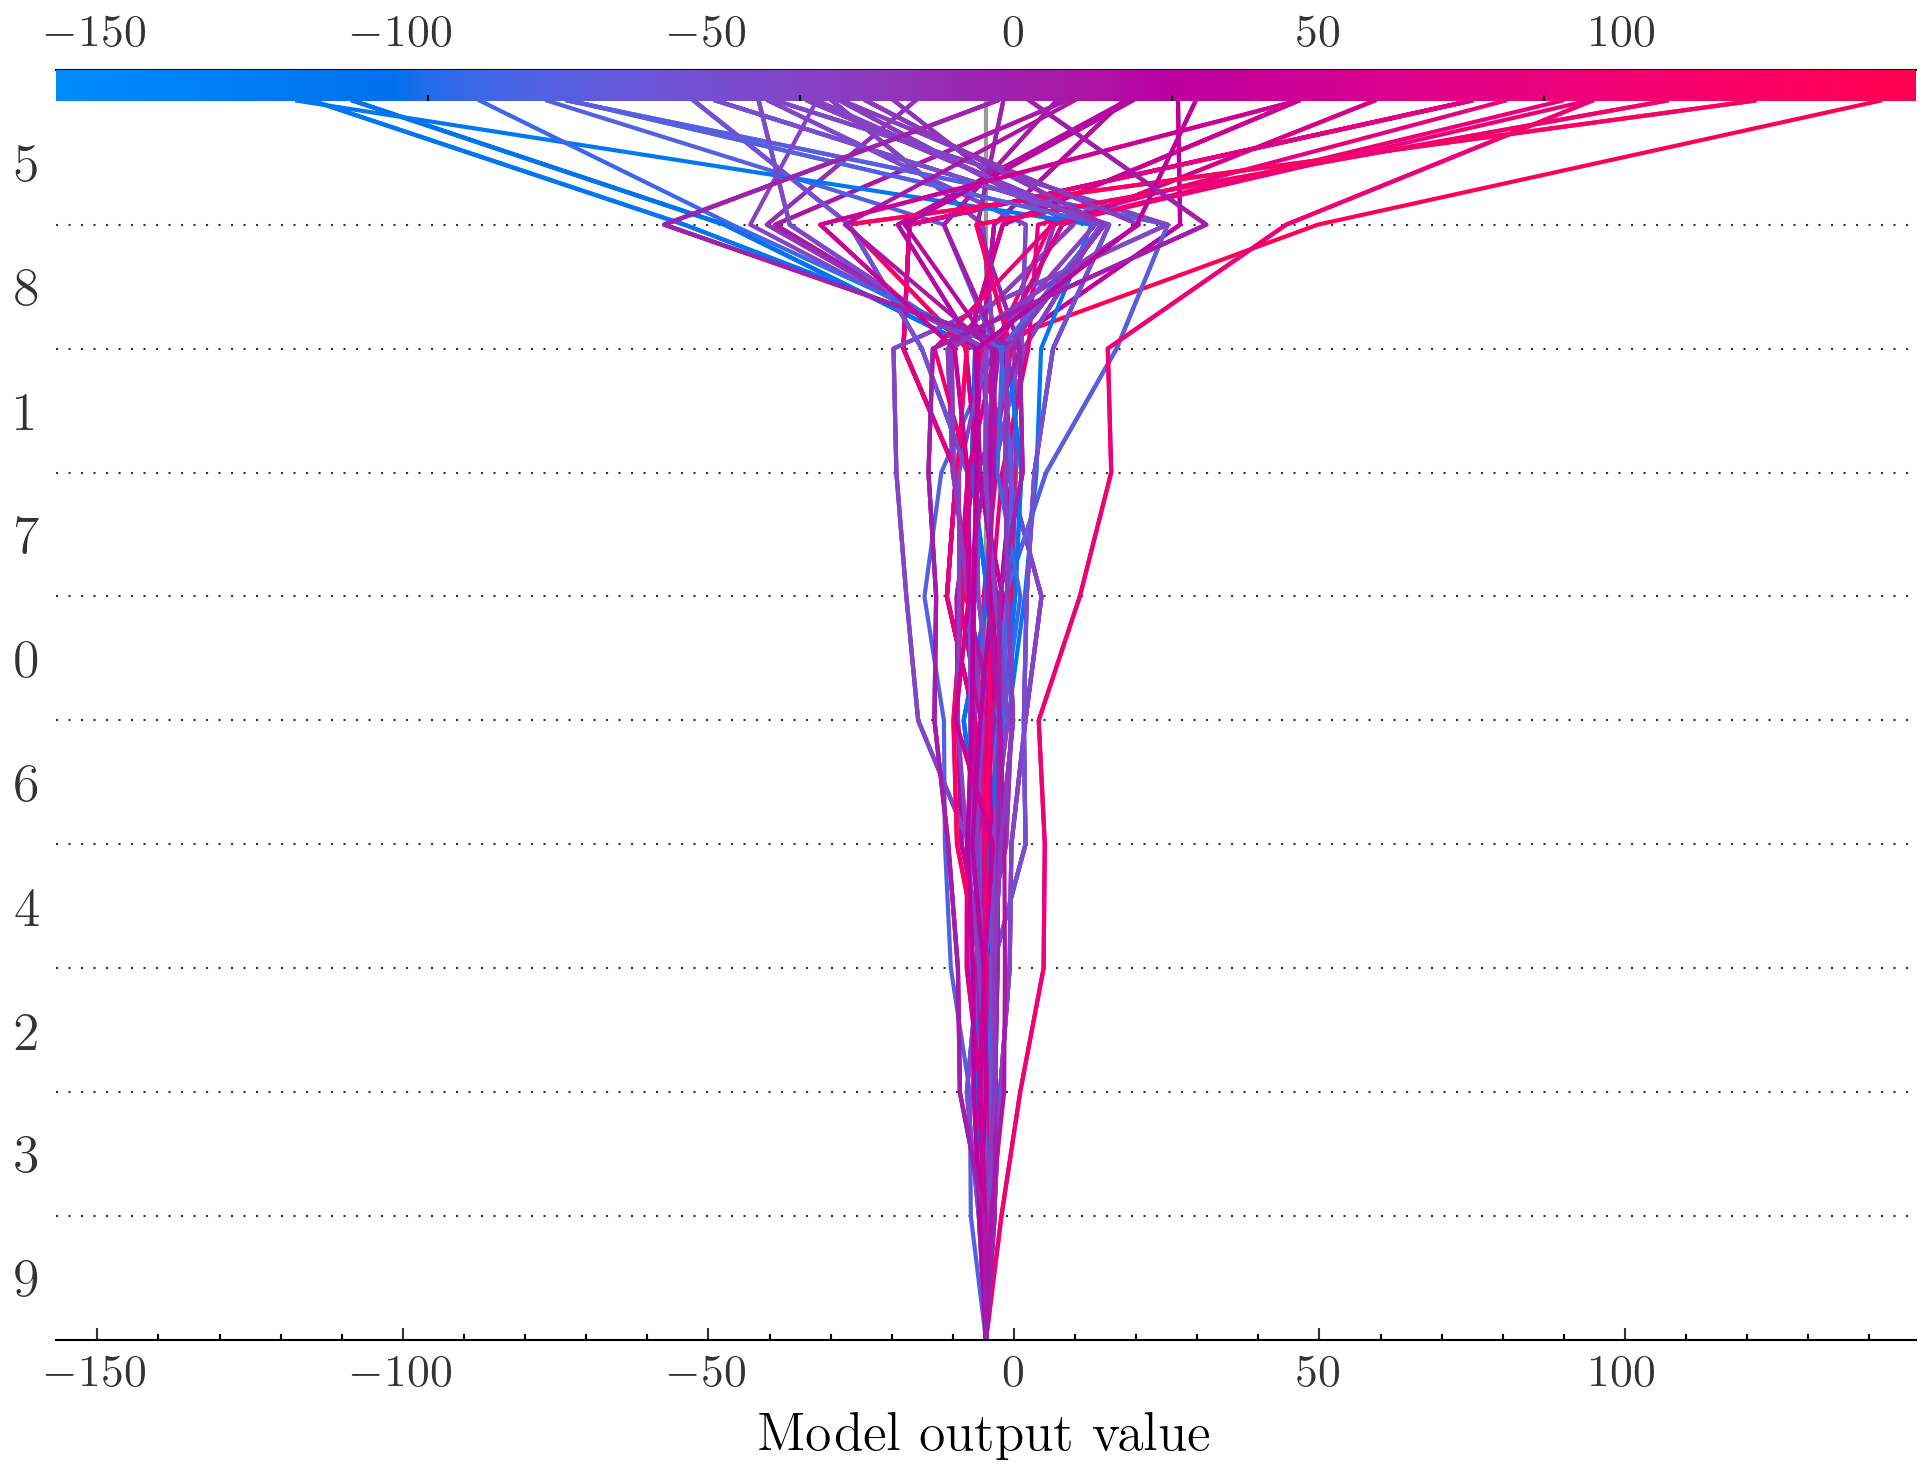

<Figure size 1050x1050 with 0 Axes>

In [7]:
model = ModelEvaluation(estimator=ms.best_model_)
model.add(RegressionAnalysis(on="indexes_val"))
model.add(ShapAnalysis(on="indexes_val", n_shap=100))
model.fit(project)

In [8]:
analyser = model.components["RegressionAnalysis"]
shap_analyser = model.components["ShapAnalysis"]

C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\palma\utils\plotting.py:97: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



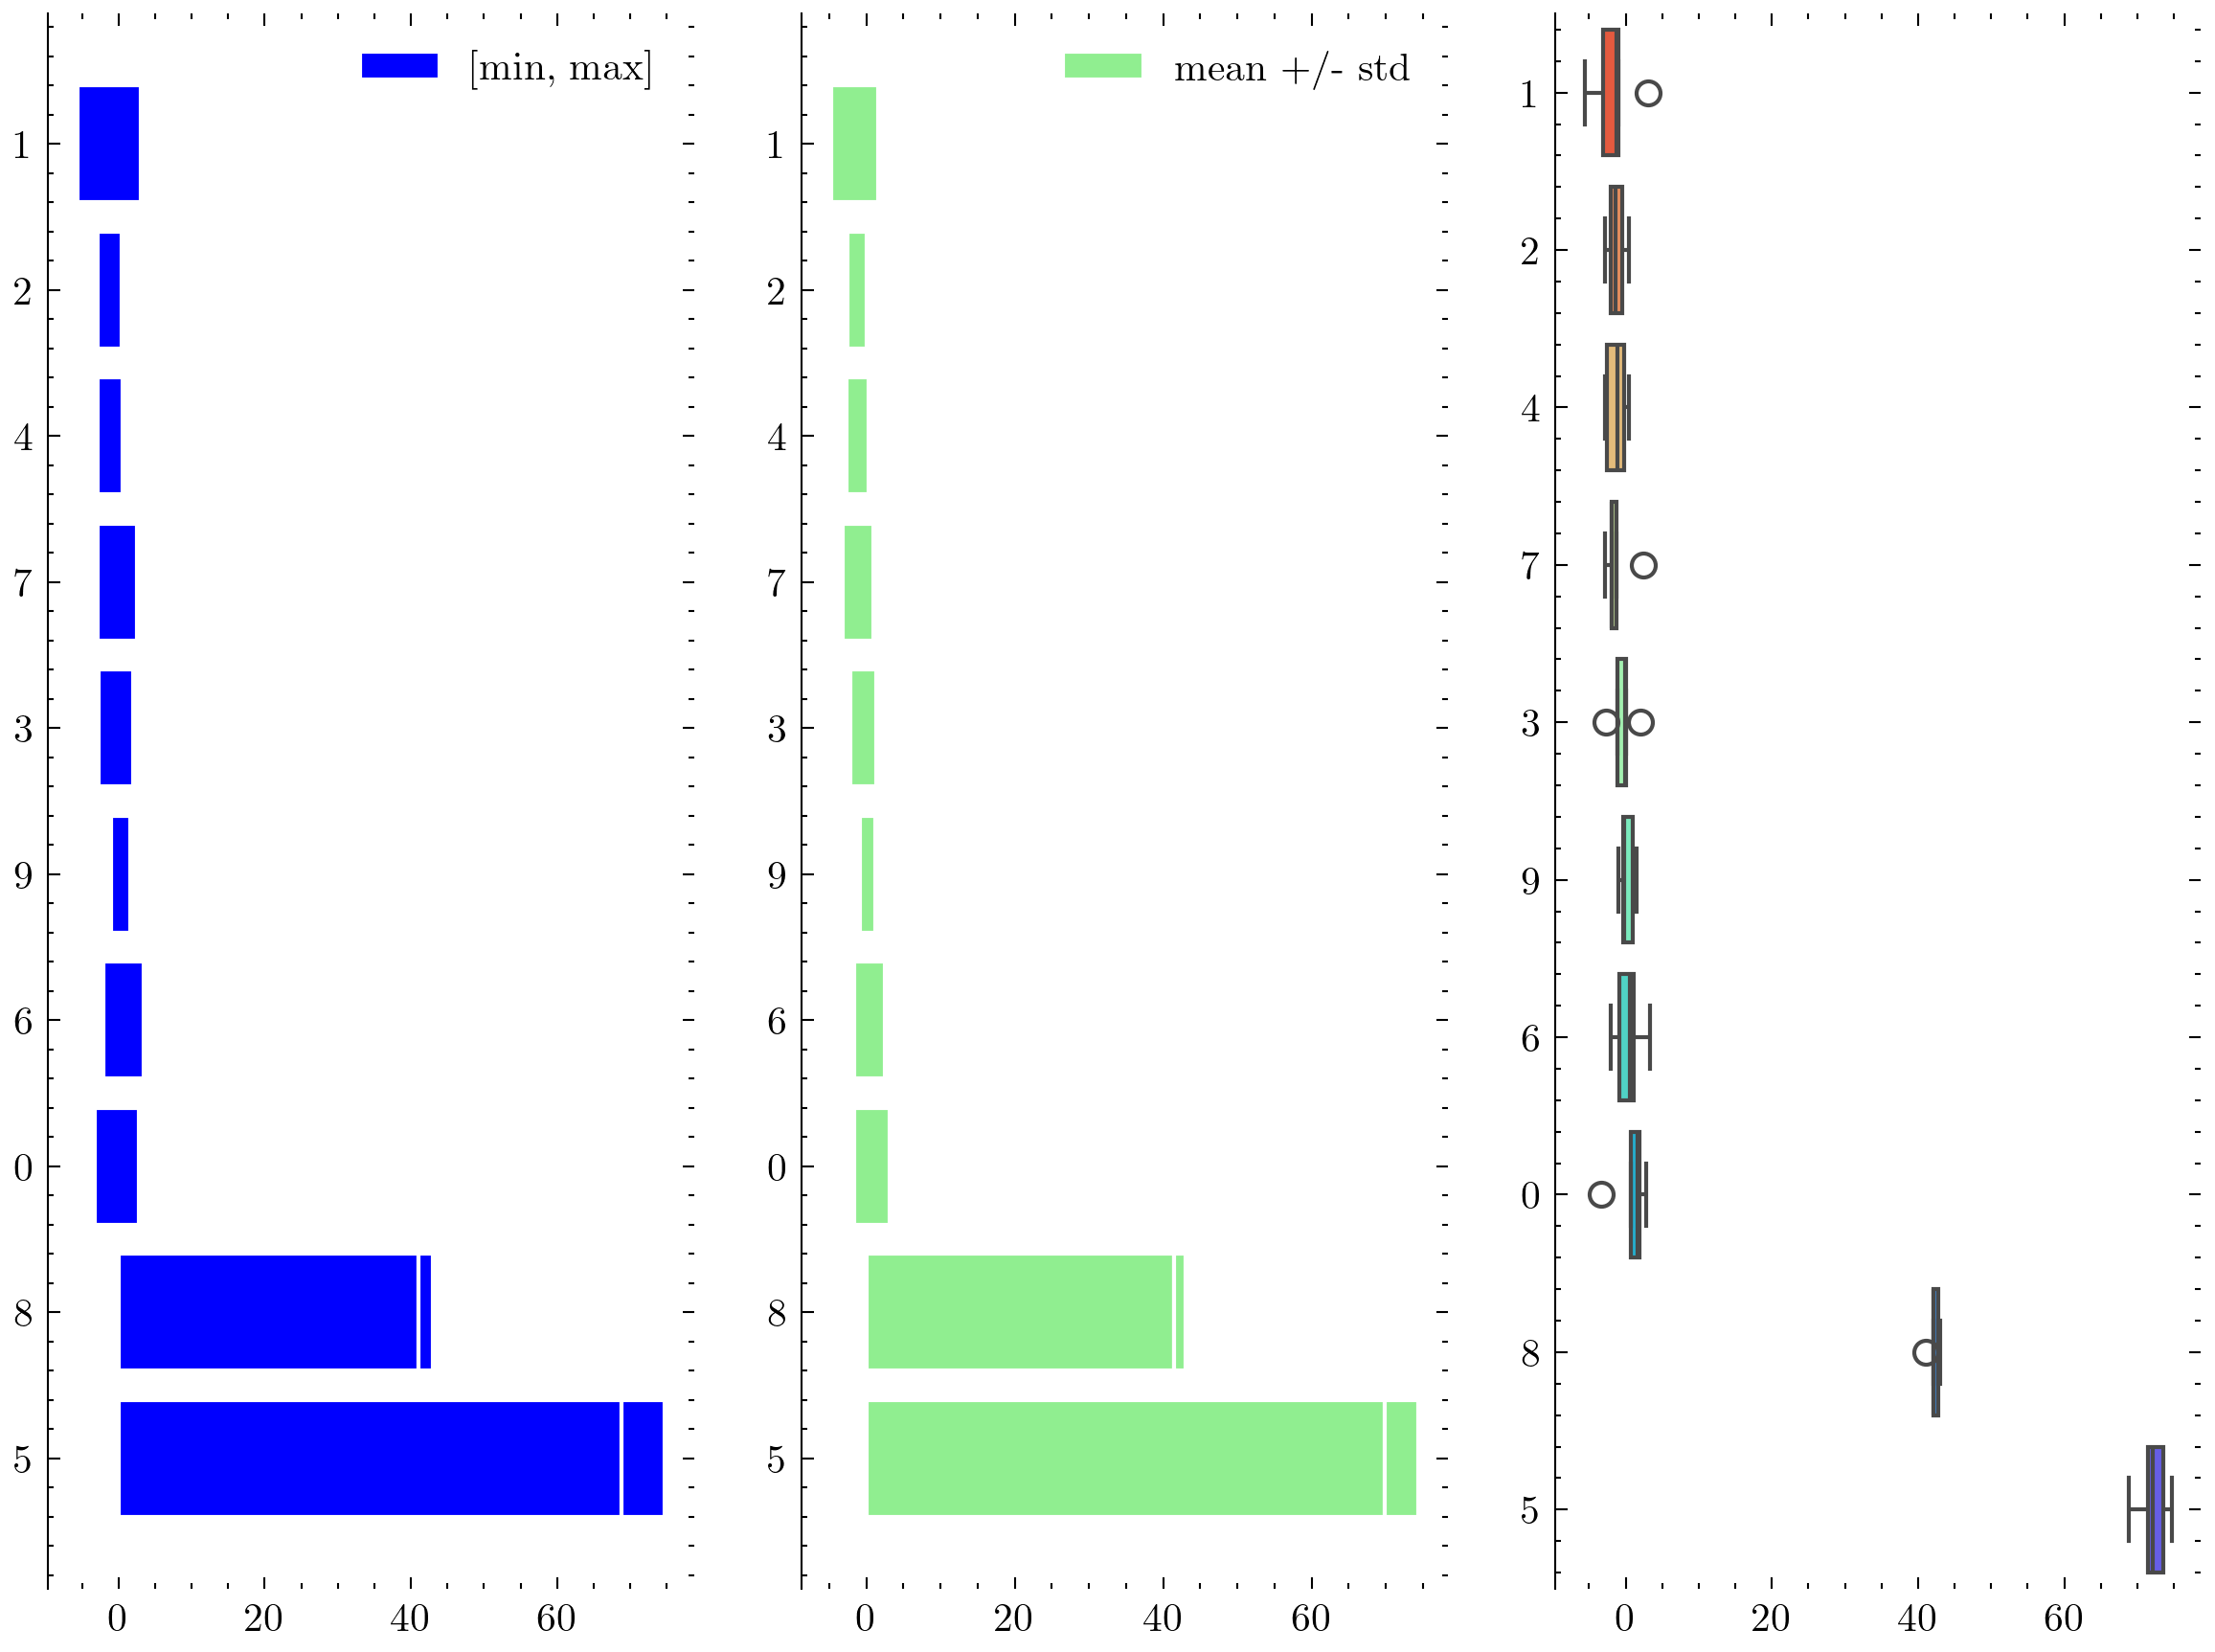

In [9]:
f, ax = plt.subplots(figsize=(8, 6), ncols=3)
plt.sca(ax[0])
analyser.plot_variable_importance(mode="minmax", color="blue")
plt.sca(ax[1])
analyser.plot_variable_importance(mode="std", color="lightgreen")
plt.sca(ax[2])
analyser.plot_variable_importance(mode="boxplot", cmap="rainbow_r")
print()

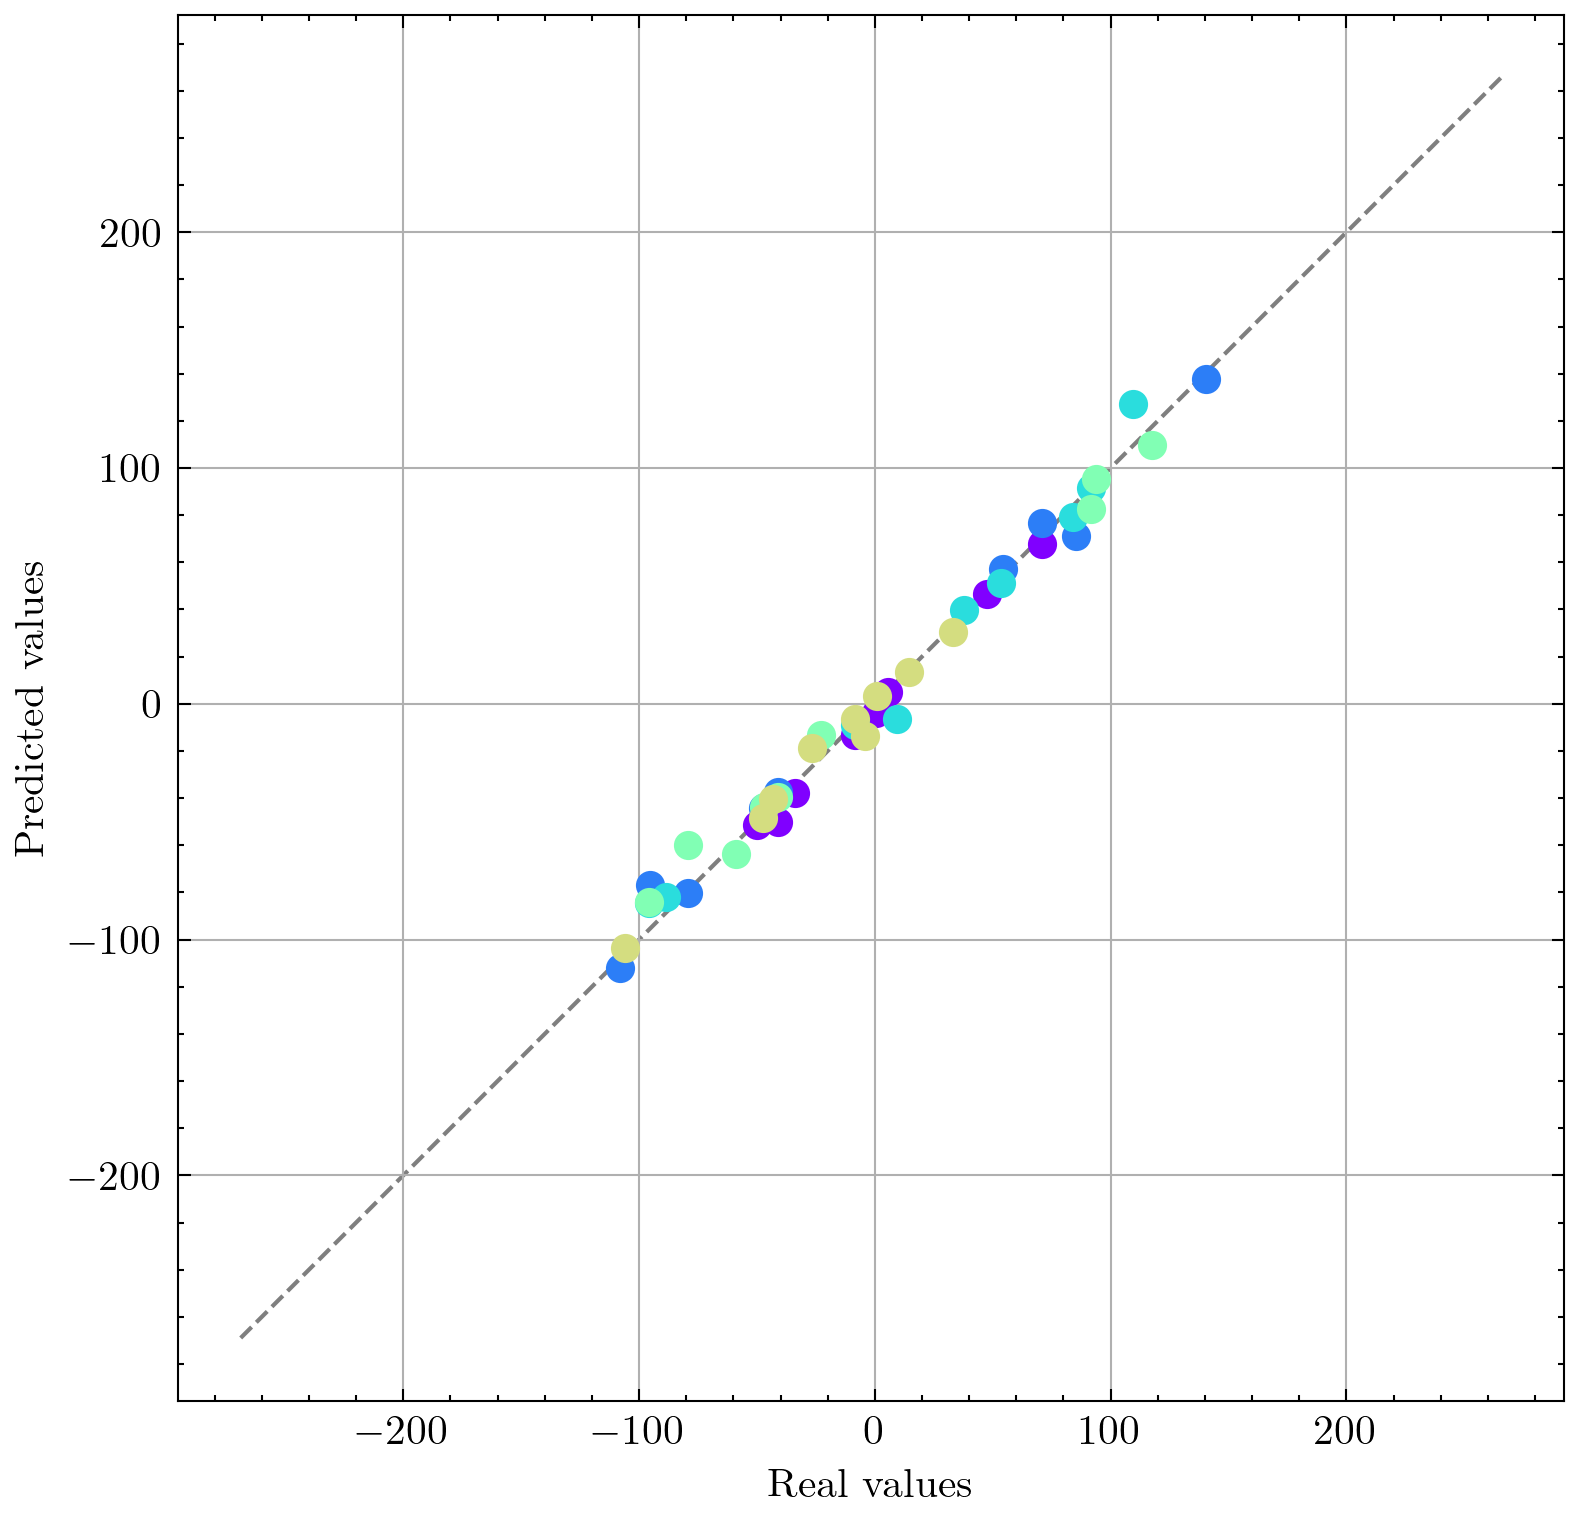

In [10]:
plt.figure(figsize=(6, 6))
analyser.plot_prediction_versus_real()

In [11]:
analyser.compute_metrics(
   { "r2": metrics.r2_score,
    "mae": metrics.mean_absolute_error,
    "mse": metrics.mean_squared_error}
)
analyser.get_test_metrics()

,max_error,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_percentage_error,mean_pinball_loss,r2_score,root_mean_squared_log_error,root_mean_squared_error,explained_variance_score,mean_tweedie_deviance,mean_poisson_deviance,mean_gamma_deviance,d2_tweedie_score,d2_pinball_score,d2_absolute_error_score,r2,mae,mse
0,9.027986,3.27982,16.842516,NaN,2.83847,1.573918,1.63991,0.989351,NaN,4.103963,0.994727,16.842516,NaN,NaN,0.989351,0.898873,0.898873,0.989351,3.27982,16.842516
1,18.328118,6.19059,70.389115,NaN,3.646784,0.079793,3.095295,0.990386,NaN,8.389822,0.990615,70.389115,NaN,NaN,0.990386,0.918169,0.918169,0.990386,6.19059,70.389115
2,17.799868,6.703069,83.771485,NaN,4.644692,0.248242,3.351534,0.98314,NaN,9.152676,0.983661,83.771485,NaN,NaN,0.98314,0.884383,0.884383,0.98314,6.703069,83.771485
3,19.11079,7.657712,86.270817,NaN,7.561432,0.129786,3.828856,0.985628,NaN,9.288209,0.987053,86.270817,NaN,NaN,0.985628,0.877024,0.877024,0.985628,7.657712,86.270817
4,9.480465,3.507645,20.240416,NaN,2.49395,0.694282,1.753823,0.98651,NaN,4.498935,0.986606,20.240416,NaN,NaN,0.98651,0.881832,0.881832,0.98651,3.507645,20.240416


In [12]:
most_important_var = analyser.variable_importance().T.mean().sort_values(ascending=False).index[0:3]

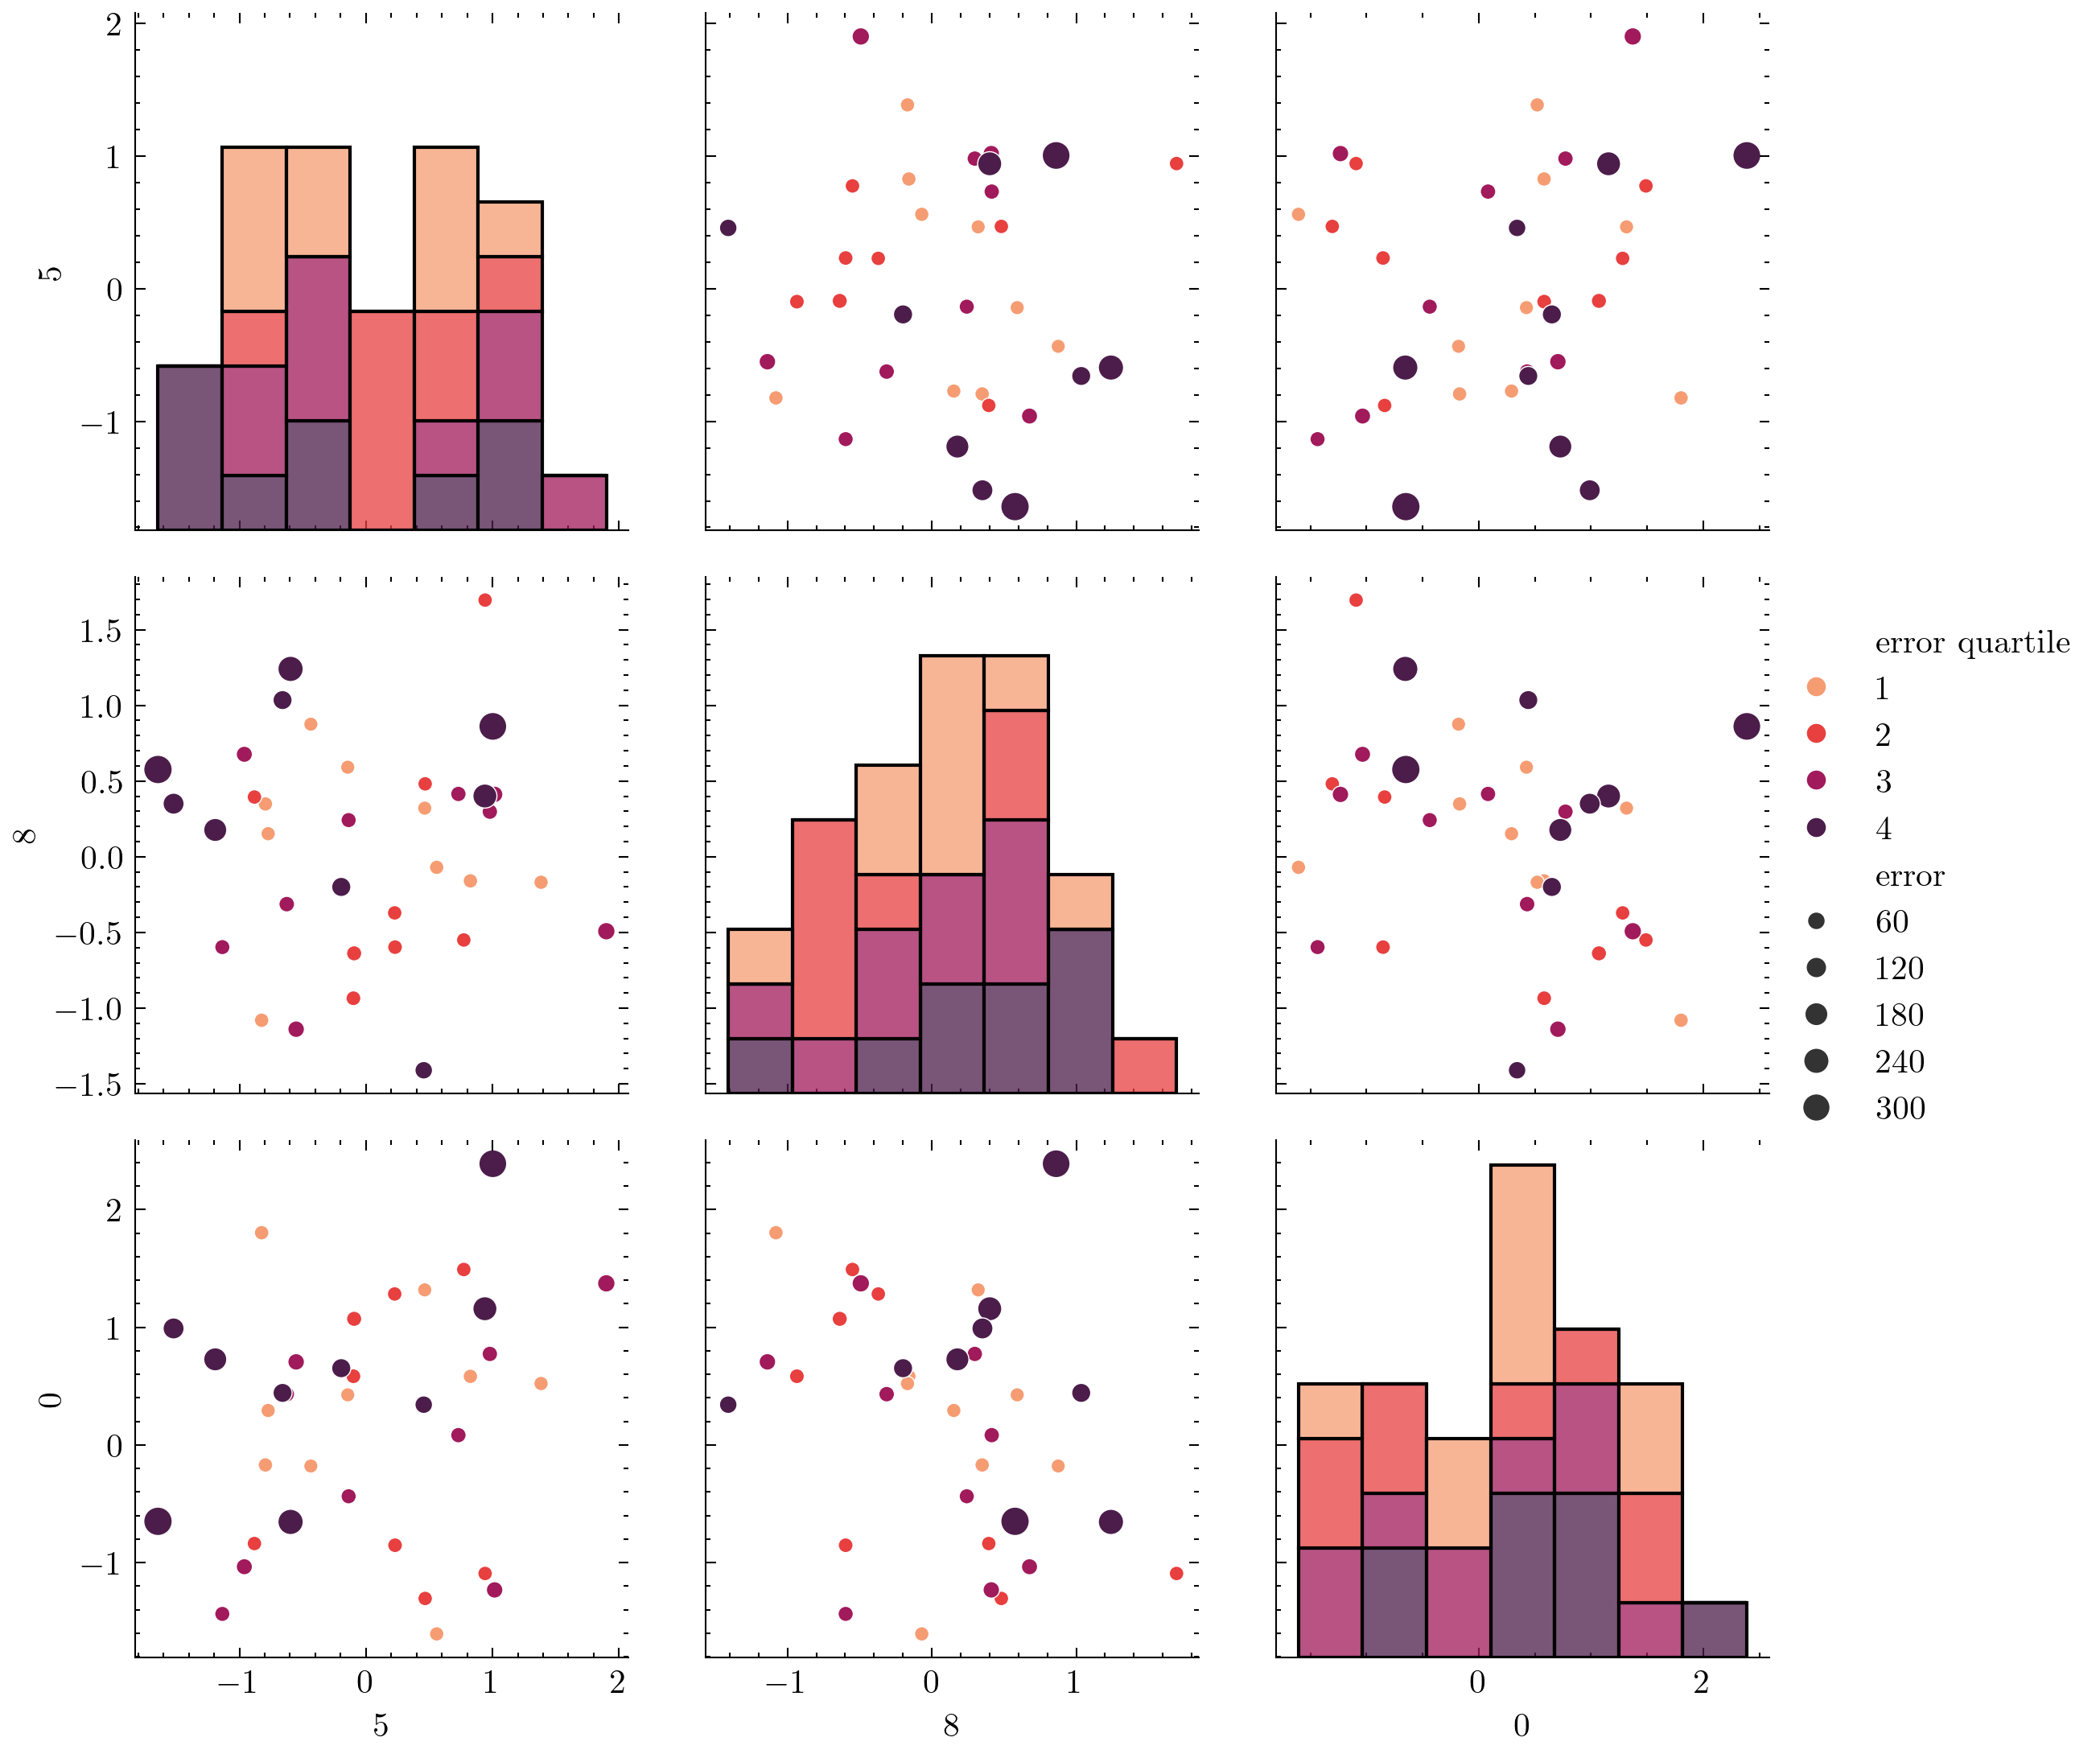

In [13]:
analyser.plot_errors_pairgrid(features=most_important_var)